In [1]:
import ast
import numpy as np
import pandas as pd
from tqdm import tqdm
from tueplots import bundles
import matplotlib.pyplot as plt
from tueplots.constants.color import rgb

plt.rcParams.update(bundles.icml2022(column="full", nrows=1, ncols=2, usetex=False))
plt.rcParams.update({"figure.dpi": 1000})

In [2]:
df = pd.read_csv("./../../dat/ProjectedPublications.csv")
unique_df = df.drop_duplicates(subset='Title', keep='first')

years = range(df['Year'].min(), df['Year'].max() + 1)
professors = df["Professor"].unique()

research_fields = [
    'Computer Vision',
    'Robotics',
    'Bioinformatics and Computational Biology',
    'Human-Computer Interaction',
    'Design Automation of Microelectronic Systems (EDA)',
    'Visualization', 
    'Web Information Retrieval',
    'Natural Language Processing',
    'Machine Learning', 
]

sorted_research_fields = ["Machine Learning", "Computer Vision", "Robotics", "Bioinformatics and Computational Biology", "Human-Computer Interaction", "Visualization", "Design Automation of Microelectronic Systems (EDA)", "Web Information Retrieval", "Natural Language Processing"]
sorted_colors = [rgb.tue_darkgreen, rgb.pn_orange, rgb.tue_darkblue, rgb.tue_lightblue, rgb.tue_brown, rgb.tue_blue, rgb.tue_green, rgb.tue_dark, rgb.tue_red]
colors = dict(zip(sorted_research_fields, sorted_colors))

def format_name(name):
    parts = name.split()
    formatted_name = parts[0][0].upper() + ". " + parts[-1]
    return formatted_name

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


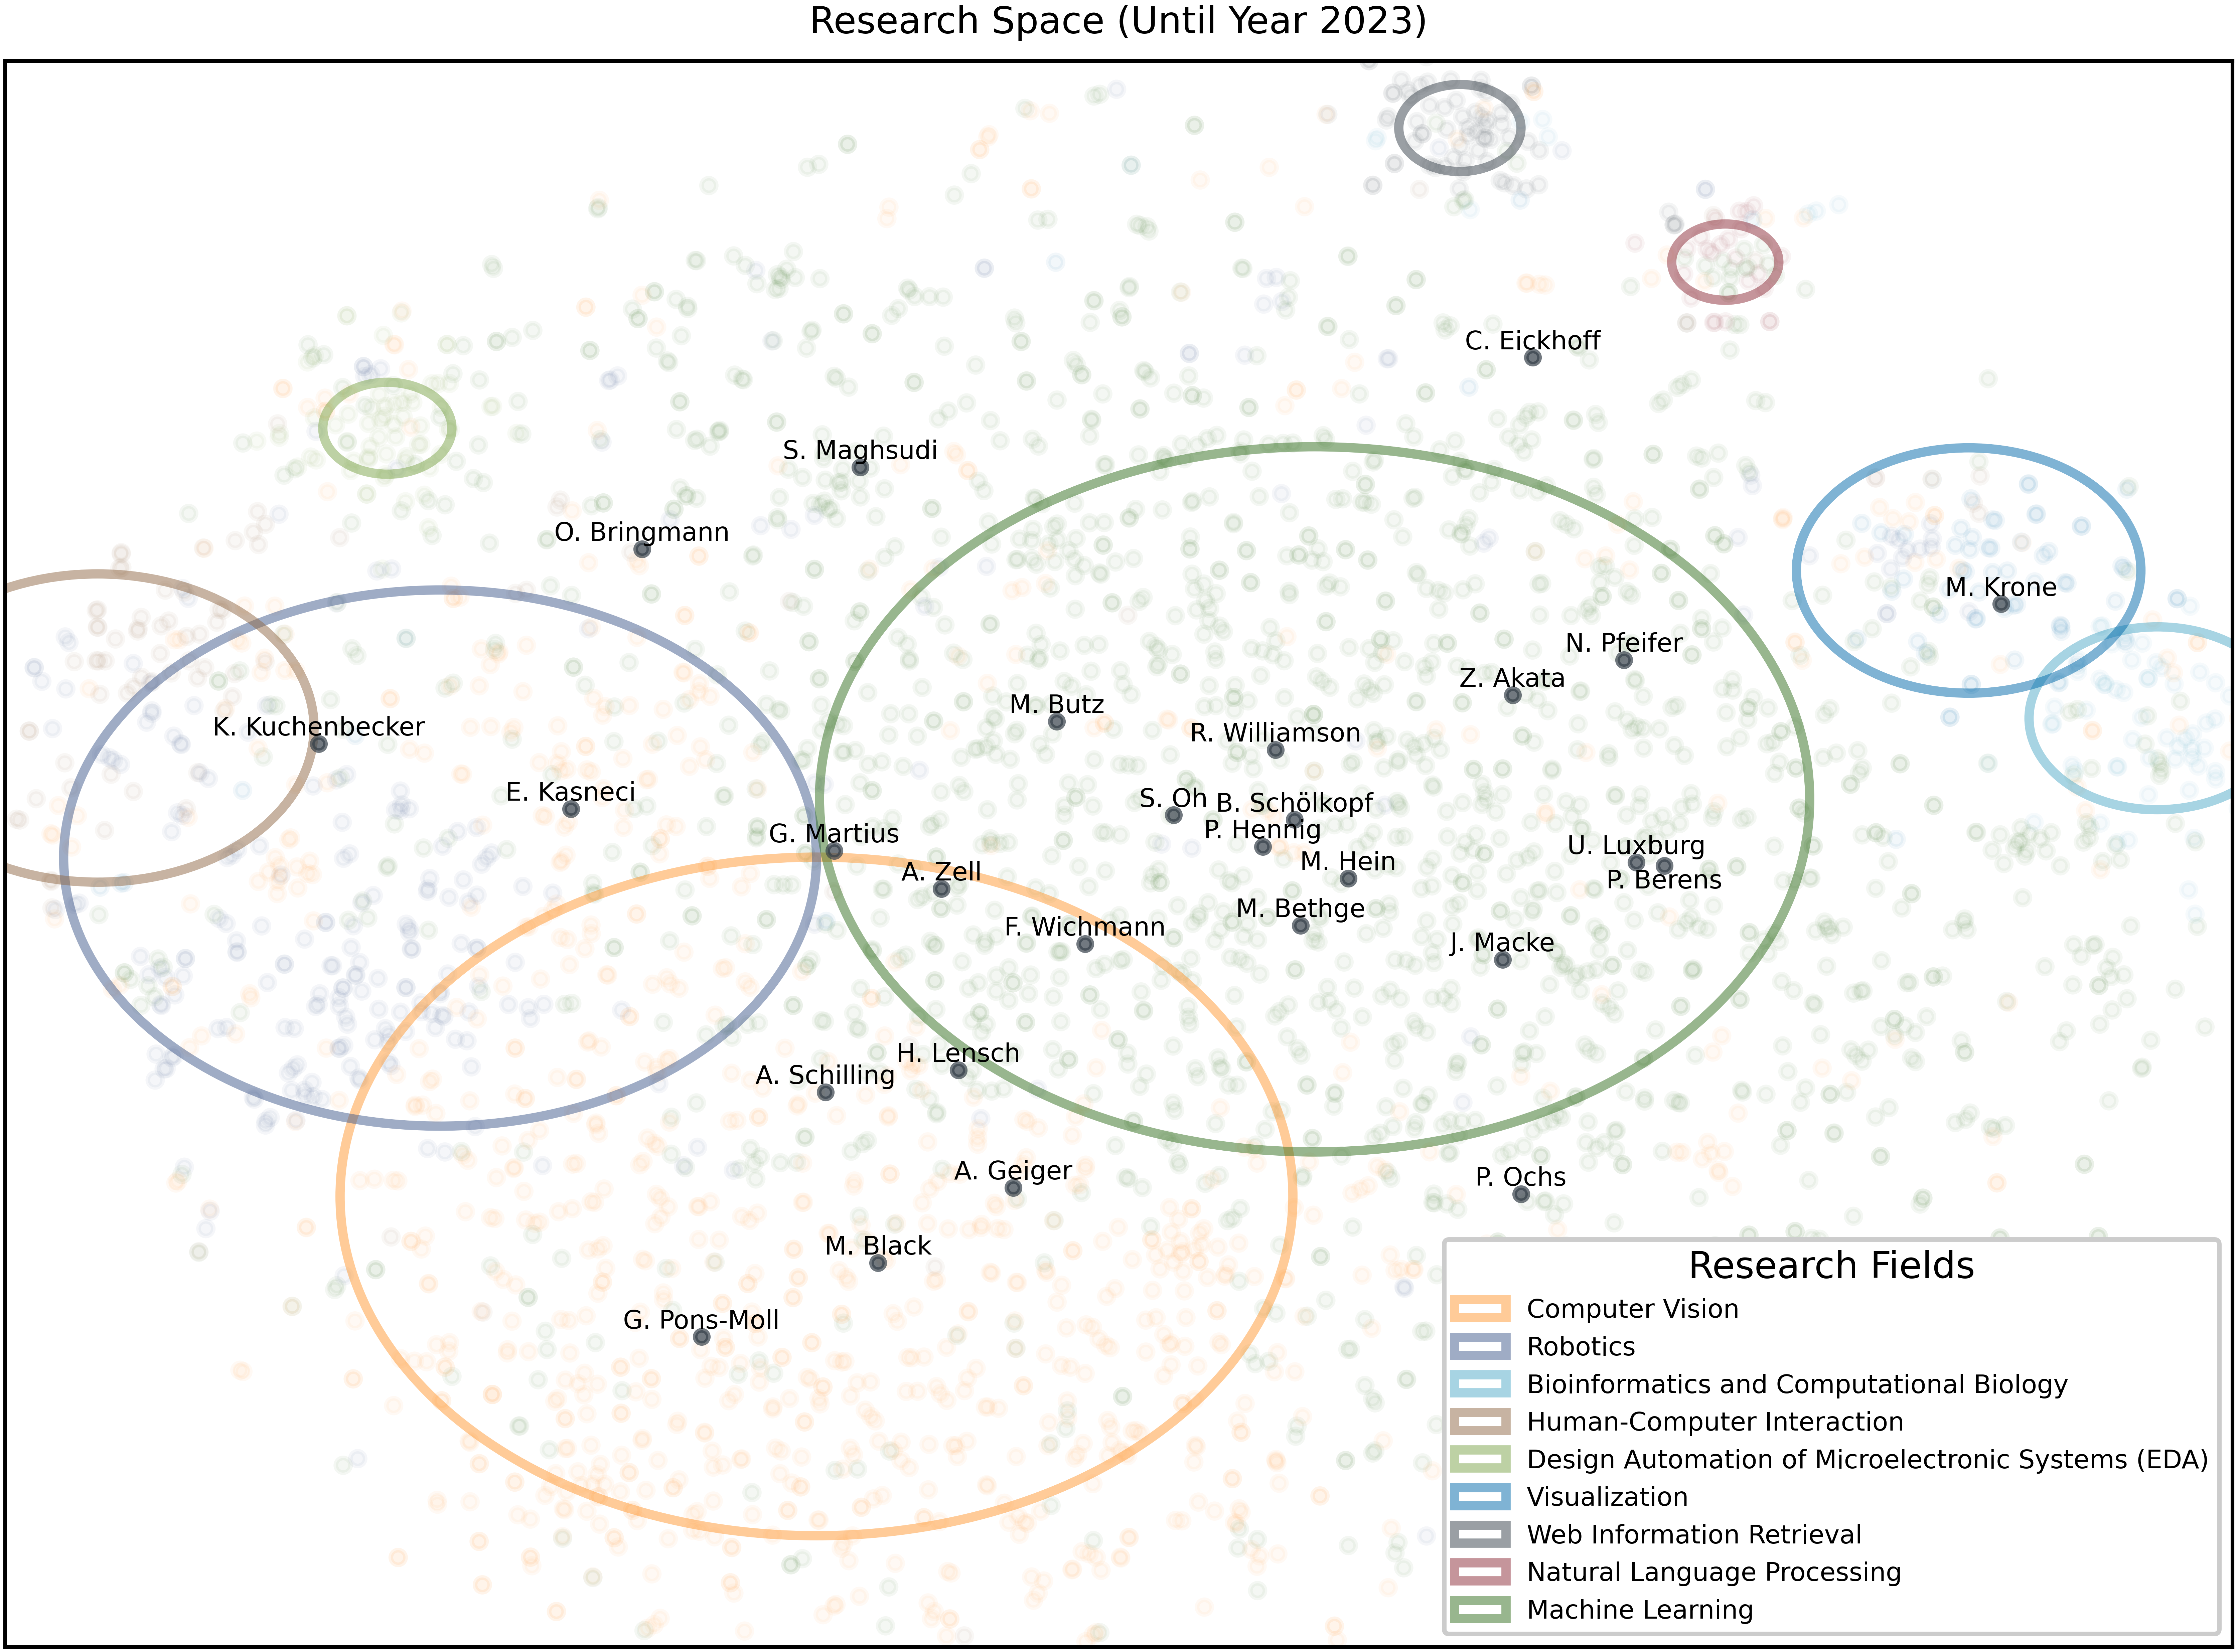

In [3]:
fig, ax = plt.subplots()
fig.set_size_inches(fig.get_size_inches()[0], 5)

# Papers
paper_colors = unique_df['Research Field'].apply(lambda x: colors[x]).tolist()
ax.scatter(unique_df['x'], unique_df['y'], color=paper_colors, alpha=0.05, s=10, zorder=1)

# Professors
for professor in professors:
    professor_df = df[df['Professor'] == professor]
    if len(professor_df) != 0:
        professor_x, professor_y = professor_df[['x', 'y']].mean()
        ax.scatter(professor_x, professor_y, color=rgb.tue_dark, alpha=0.7, s=8, zorder=2)
        y, va = 0.3, 'bottom'
        if professor == 'Philipp Berens':
            y, va = -y, 'top'
        ax.text(professor_x, professor_y + y, format_name(professor), ha='center', va=va, fontsize=5.5, zorder=4)

# Research Fields
legend = False
for research_field in research_fields:
    research_field_df = unique_df[unique_df["Research Field"] == research_field]
    if len(research_field_df) > 1:
        legend = True
        research_field_df = research_field_df[['x', 'y']].to_numpy()
        research_field_df = research_field_df[np.argsort(np.linalg.norm(research_field_df - research_field_df.mean(axis=0), axis=1))[:int(0.90 * len(research_field_df))]]
        research_field_mean = research_field_df.mean(axis=0)
        research_field_radius = np.mean(np.linalg.norm(research_field_df - research_field_mean, axis=1))
        ax.add_patch(plt.Circle(research_field_mean, research_field_radius, color=(*colors[research_field], 0.5), linewidth=2, fill=False, zorder=1, label=research_field))

ax.set_xlim([-80, 80])
ax.set_ylim([-80, 80])

ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title(f'Research Space (Until Year 2023)')

if legend:
    ax.legend(title="Research Fields", loc="lower right", framealpha=1, facecolor="white", frameon=True, fontsize='x-small')

fig.savefig(f'./fig_ResearchSpace.pdf')